In [1]:
import numpy as np
import scipy.stats as stat
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [19]:
mnist = np.load("data_from_sharedrive/imtrain.npy")
mnist_label = np.load("data_from_sharedrive/labtrain.npy")

mnist_test = np.load("data_from_sharedrive/imtest.npy")
mnist_test_label = np.load("data_from_sharedrive/labtest.npy")

### Set noise levels

In [24]:
data_noise_level = 3
lab_noise_level = 0.05

#### Add noise to train labels

In [25]:
noise = -np.abs(np.random.normal(scale=lab_noise_level, size=(mnist_label.shape)))
mask = np.multiply(mnist_label, 1 - np.abs(np.random.normal(scale=0.05, size=(mnist_label.shape))))

excess_prob = 1 - mask[np.where(mask!=0)]

dist_prob = np.where(mnist_label!=0, mnist_label, 2) - np.ones(mnist_label.shape)
dist_prob = np.multiply(dist_prob, np.abs(np.random.normal(size=dist_prob.shape)))

row_sums = dist_prob.sum(axis=1)
dist_prob = dist_prob / row_sums[:, np.newaxis] * excess_prob[:, np.newaxis]

mnist_label_noisy = mask + dist_prob

#### Add noise to test labels

In [26]:
noise = -np.abs(np.random.normal(scale=lab_noise_level, size=(mnist_test_label.shape)))
mask = np.multiply(mnist_test_label, 1 - np.abs(np.random.normal(scale=0.05, size=(mnist_test_label.shape))))

excess_prob = 1 - mask[np.where(mask!=0)]

dist_prob = np.where(mnist_test_label!=0, mnist_test_label, 2) - np.ones(mnist_test_label.shape)
dist_prob = np.multiply(dist_prob, np.abs(np.random.normal(size=dist_prob.shape)))

row_sums = dist_prob.sum(axis=1)
dist_prob = dist_prob / row_sums[:, np.newaxis] * excess_prob[:, np.newaxis]

mnist_test_label_noisy = mask + dist_prob

#### Add noise to train data

In [37]:
mask = np.where(mnist==0, mnist, -1) + 1
mask *= np.abs(np.random.normal(scale=data_noise_level, size=(mask.shape)))
mnist_noisy_trunc = np.trunc(mask) + mnist
mnist_noisy_rnd = np.around(mask) + mnist

#### Add noise to test data

In [33]:
mask = np.where(mnist_test==0, mnist_test, -1) + 1
mask *= np.abs(np.random.normal(scale=data_noise_level, size=(mask.shape)))
mnist_test_noisy_trunc = np.trunc(mask) + mnist_test
mnist_test_noisy_rnd = np.around(mask) + mnist_test

#### Save the data 

In [38]:
np.save("data_from_sharedrive/imtrain_noisy.npy", mnist_noisy_trunc)
np.save("data_from_sharedrive/labtrain_noisy.npy", mnist_label_noisy)
np.save("data_from_sharedrive/imtest_noisy.npy", mnist_test_noisy_trunc)
np.save("data_from_sharedrive/labtest_noisy.npy", mnist_test_label_noisy)

### Just checking work

<IPython.core.display.Javascript object>


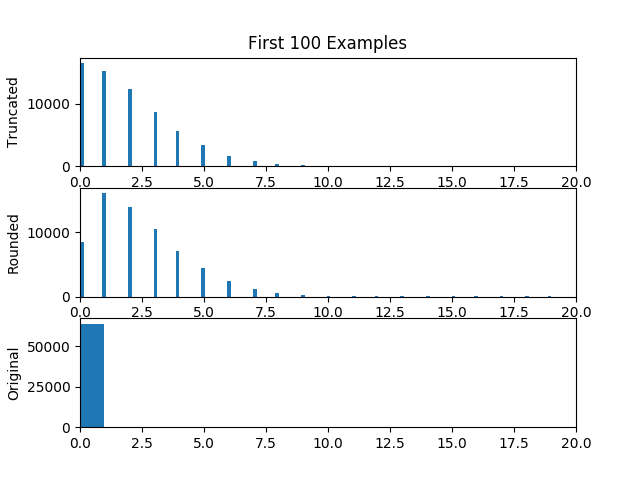

In [23]:
examples = 100

plt.subplot(3,1,1)
plt.title('First %d Examples' % examples)

plt.hist(mnist_noisy_trunc[0:examples,:][np.where(mnist_noisy_trunc[0:examples,:] < 20)], normed=False, bins='auto')
plt.xlim(0,20)
plt.ylabel('Truncated')

plt.subplot(3,1,2)
plt.hist(mnist_noisy_rnd[0:examples,:][np.where(mnist_noisy_rnd[0:examples,:] < 20)], normed=False, bins='auto')
plt.xlim(0,20)
plt.ylabel('Rounded')

plt.subplot(3,1,3)
plt.hist(mnist[0:examples,:][np.where(mnist[0:examples,:] < 20)], normed=False, bins=20)
plt.xlim(0,20)
plt.ylabel('Original')

plt.show()

<IPython.core.display.Javascript object>


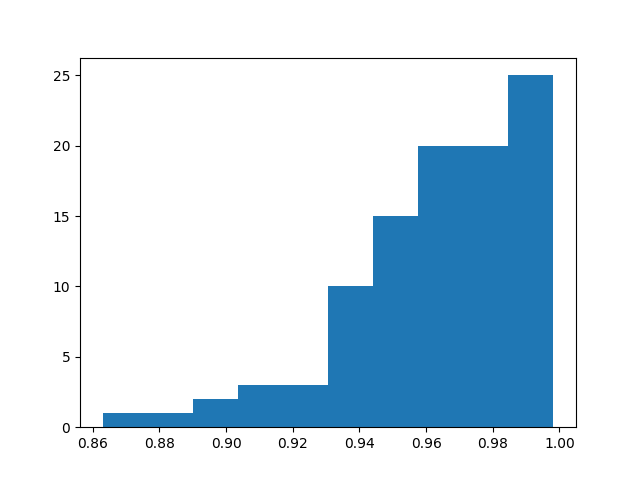

In [14]:
examples = 100

plt.hist(mnist_label_noisy[0:examples,:][np.where(mnist_label_noisy[0:examples,:] > 0.5)])
plt.show()

In [18]:
print(np.std(mnist_noisy_rnd[0:500][np.where(mnist_noisy_rnd[0:500] < 20)]))
print(np.std(mnist_noisy_trunc[0:5000][np.where(mnist_noisy_trunc[0:5000] < 20)]))
print(np.abs(np.random.normal(scale=5,size=(2000))).std())

print(np.std(mnist_label_noisy[0:5000][np.where(mnist_label_noisy[0:5000] > 0.5)]))

2.16025667637
2.15425739518
2.92510709859
0.0303656195104


<IPython.core.display.Javascript object>


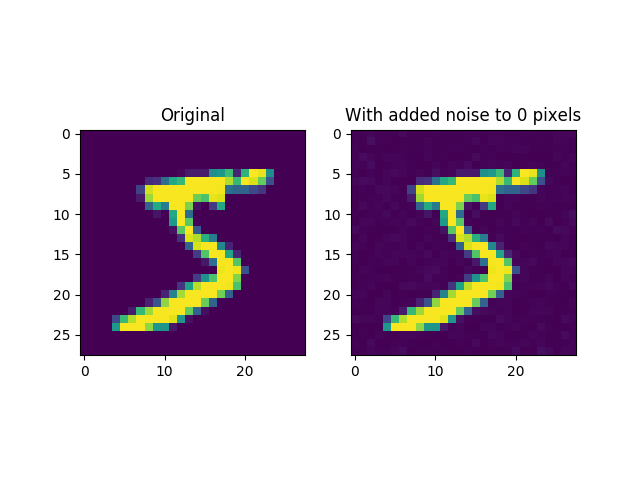

In [20]:
view_orig = mnist_norm[0].reshape(28,28)
view = mnist_noisy_trunc[0].reshape(28,28)


plt.subplot(1,2,1)
plt.imshow(view_orig)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(view)
plt.title('With added noise to 0 pixels')
plt.show()